Importing the Dependencies

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer
import joblib

Data Collection and Analysis

In [49]:
#loading the datset from csv file
big_mart_data = pd.read_csv('/content/Train.csv')

In [50]:
#first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
# no. of data points and no. of features
big_mart_data.shape

(8523, 12)

In [52]:
# getting some info about data
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features -
- Item_Identifier  
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size  
- Outlet_Location_Type     
- Outlet_Type    

In [53]:
# checking for missing value
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing values
- Replacing non-categorical data with mean
- Replacing categorical data with mode

In [54]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [55]:
#filling the missing values in "Item_weight column with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(),inplace = True)

In [56]:
#filling the missing values in "Outlet_Size with "Mode" value
big_mart_data['Outlet_Size'].fillna(big_mart_data['Outlet_Size'].mode()[0],inplace = True)

In [57]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [58]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [59]:
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [60]:
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [61]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [62]:
sns.set()

Numerical Features


<ipython-input-63-e51472b519f2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


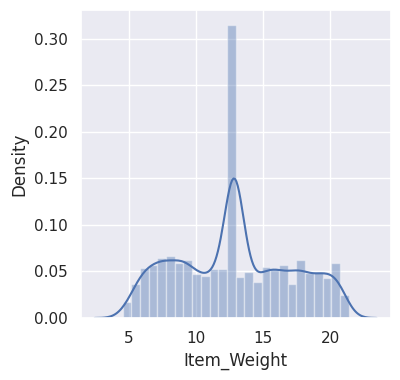

In [63]:
# Item_Weight distribution
plt.figure(figsize=(4,4))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

<ipython-input-64-1a401a568787>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


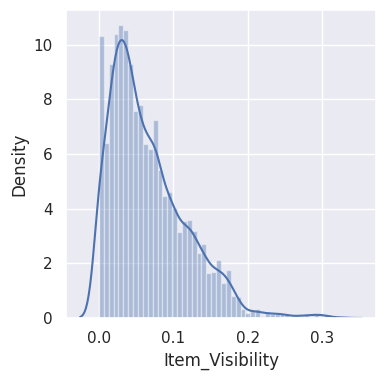

In [64]:
# Item_Visibility distribution
plt.figure(figsize=(4,4))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

<ipython-input-65-79ee9aac3783>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


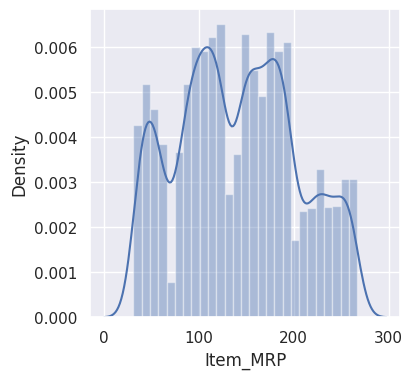

In [65]:
# Item_MRP distribution
plt.figure(figsize=(4,4))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

<ipython-input-66-a8c26881ff0e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Outlet_Sales'])


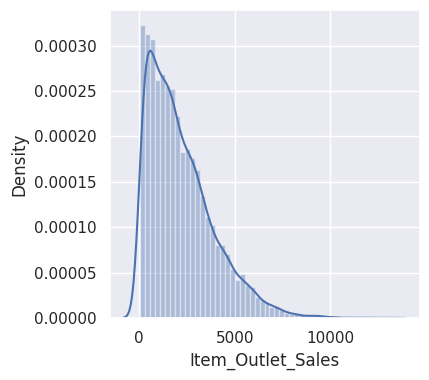

In [66]:
# Item_MRP distribution
plt.figure(figsize=(4,4))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

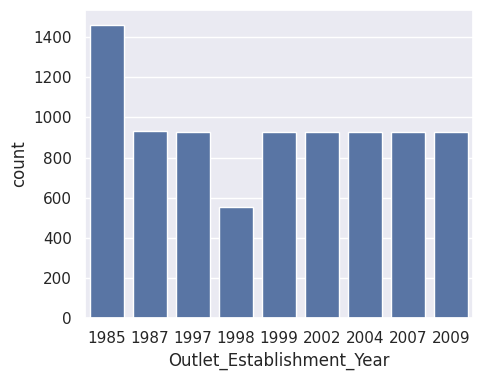

In [67]:
# Outlet_Establishment_Year column
plt.figure(figsize = (5,4))
sns.countplot(x='Outlet_Establishment_Year',data=big_mart_data)
plt.show()

Categorical Features


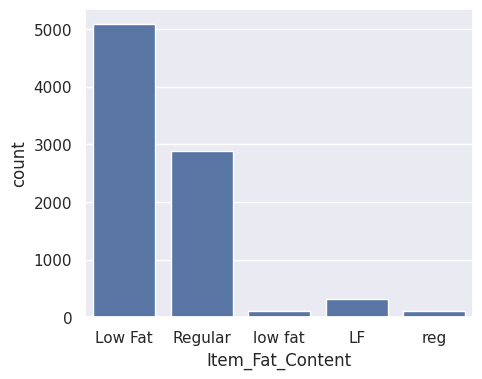

In [68]:
# Item_Fat_Content column
plt.figure(figsize = (5,4))
sns.countplot(x='Item_Fat_Content',data=big_mart_data)
plt.show()

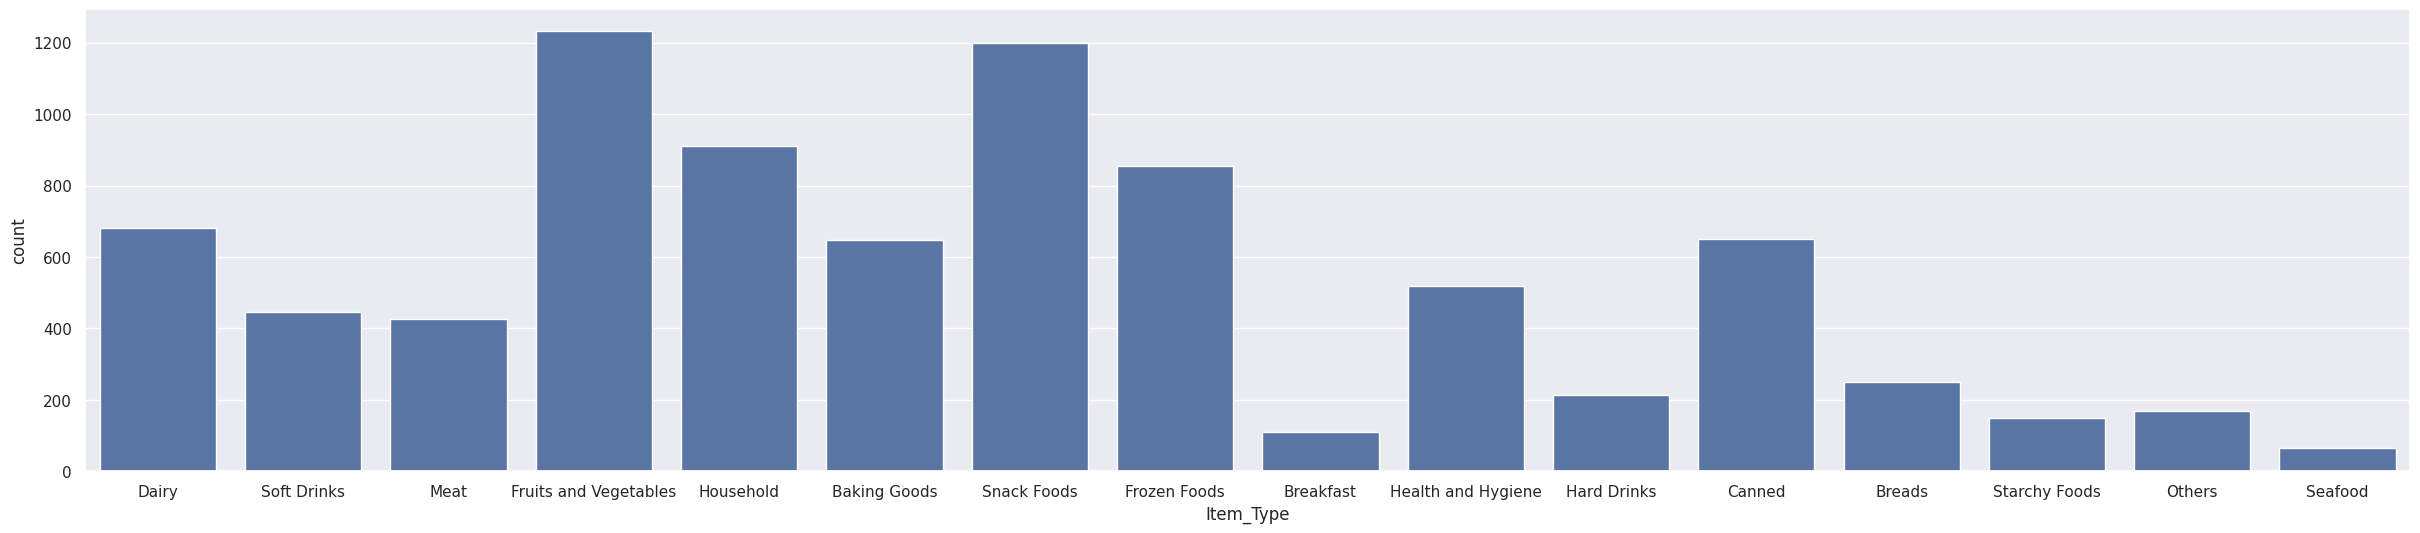

In [69]:
# Item_Type column
plt.figure(figsize = (30,6))
sns.countplot(x='Item_Type',data=big_mart_data)
plt.show()

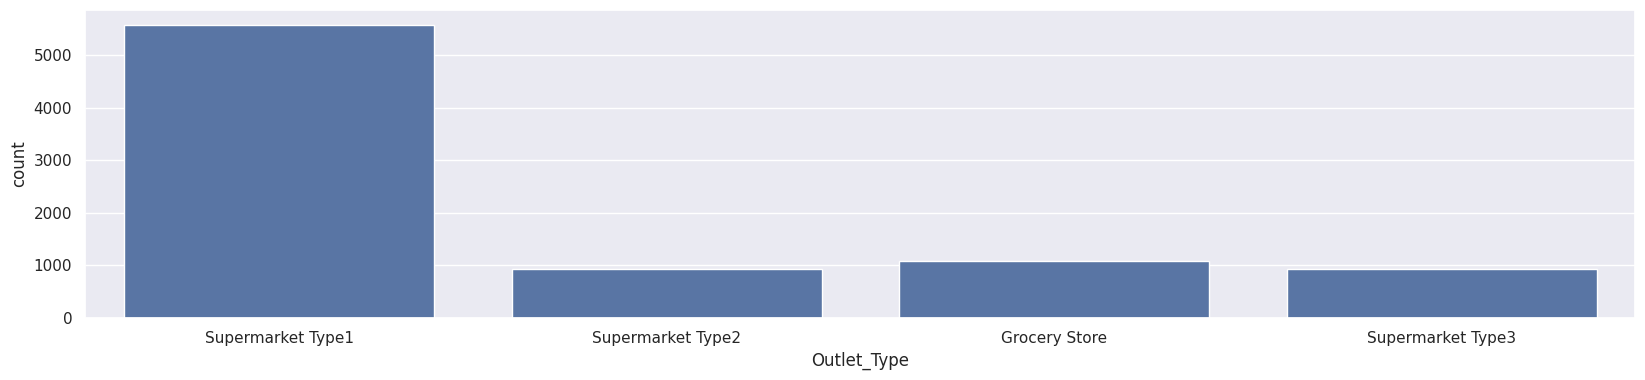

In [70]:
plt.figure(figsize=(20,4))
sns.countplot(x='Outlet_Type',data=big_mart_data)
plt.show()

Data Preprocessing

In [71]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [72]:
print(big_mart_data['Outlet_Size'])

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object


In [73]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [74]:
big_mart_data.replace({'Item_Fat_Content' : {'low fat': 'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [75]:
big_mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding (Converting categorical values to numerical values)

In [76]:
encoder = LabelEncoder()

In [77]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])
big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])
big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])
big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])
big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])
big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])


In [78]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Features and Target


In [79]:
X = big_mart_data.drop(columns='Item_Outlet_Sales',axis=1)
Y = big_mart_data['Item_Outlet_Sales']

Splitting the data into Training data and Testing Data

In [80]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [81]:
print(X.shape , X_train.shape , X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

In [82]:
regressor = XGBRegressor()

In [83]:
regressor.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [84]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [85]:
r2_train = metrics.r2_score(Y_train , training_data_prediction)

In [86]:
print(r2_train)

0.8759287778441955


In [87]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [88]:
r2_test = metrics.r2_score(Y_test,test_data_prediction)

In [89]:
print(r2_test)

0.5060117482714839


In [93]:
# Refit Label Encoders on full dataset to capture all possible labels
encoder_item_identifier = LabelEncoder().fit(big_mart_data['Item_Identifier'])
encoder_item_fat_content = LabelEncoder().fit(big_mart_data['Item_Fat_Content'])
encoder_item_type = LabelEncoder().fit(big_mart_data['Item_Type'])
encoder_outlet_identifier = LabelEncoder().fit(big_mart_data['Outlet_Identifier'])
encoder_outlet_size = LabelEncoder().fit(big_mart_data['Outlet_Size'])
encoder_outlet_location_type = LabelEncoder().fit(big_mart_data['Outlet_Location_Type'])
encoder_outlet_type = LabelEncoder().fit(big_mart_data['Outlet_Type'])

In [94]:
def predictive_system(input_data):
    # Convert input data to a DataFrame
    input_data = pd.DataFrame(input_data, index=[0])

    # Preprocessing input data
    input_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)
    input_data['Outlet_Size'].fillna(big_mart_data['Outlet_Size'].mode()[0], inplace=True)
    input_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

    # Encoding with handling for unseen labels
    input_data['Item_Identifier'] = input_data['Item_Identifier'].map(lambda s: '<unknown>' if s not in encoder_item_identifier.classes_ else s)
    encoder_item_identifier.classes_ = np.append(encoder_item_identifier.classes_, '<unknown>')
    input_data['Item_Identifier'] = encoder_item_identifier.transform(input_data['Item_Identifier'])

    input_data['Item_Fat_Content'] = input_data['Item_Fat_Content'].map(lambda s: '<unknown>' if s not in encoder_item_fat_content.classes_ else s)
    encoder_item_fat_content.classes_ = np.append(encoder_item_fat_content.classes_, '<unknown>')
    input_data['Item_Fat_Content'] = encoder_item_fat_content.transform(input_data['Item_Fat_Content'])

    input_data['Item_Type'] = input_data['Item_Type'].map(lambda s: '<unknown>' if s not in encoder_item_type.classes_ else s)
    encoder_item_type.classes_ = np.append(encoder_item_type.classes_, '<unknown>')
    input_data['Item_Type'] = encoder_item_type.transform(input_data['Item_Type'])

    input_data['Outlet_Identifier'] = input_data['Outlet_Identifier'].map(lambda s: '<unknown>' if s not in encoder_outlet_identifier.classes_ else s)
    encoder_outlet_identifier.classes_ = np.append(encoder_outlet_identifier.classes_, '<unknown>')
    input_data['Outlet_Identifier'] = encoder_outlet_identifier.transform(input_data['Outlet_Identifier'])

    input_data['Outlet_Size'] = input_data['Outlet_Size'].map(lambda s: '<unknown>' if s not in encoder_outlet_size.classes_ else s)
    encoder_outlet_size.classes_ = np.append(encoder_outlet_size.classes_, '<unknown>')
    input_data['Outlet_Size'] = encoder_outlet_size.transform(input_data['Outlet_Size'])

    input_data['Outlet_Location_Type'] = input_data['Outlet_Location_Type'].map(lambda s: '<unknown>' if s not in encoder_outlet_location_type.classes_ else s)
    encoder_outlet_location_type.classes_ = np.append(encoder_outlet_location_type.classes_, '<unknown>')
    input_data['Outlet_Location_Type'] = encoder_outlet_location_type.transform(input_data['Outlet_Location_Type'])

    input_data['Outlet_Type'] = input_data['Outlet_Type'].map(lambda s: '<unknown>' if s not in encoder_outlet_type.classes_ else s)
    encoder_outlet_type.classes_ = np.append(encoder_outlet_type.classes_, '<unknown>')
    input_data['Outlet_Type'] = encoder_outlet_type.transform(input_data['Outlet_Type'])

    # Make prediction
    prediction = regressor.predict(input_data)
    return prediction[0]

# Example usage of predictive system
example_input = {
    'Item_Identifier': 'FDA15',
    'Item_Weight': 9.3,
    'Item_Fat_Content': 'Low Fat',
    'Item_Visibility': 0.016047301,
    'Item_Type': 'Dairy',
    'Item_MRP': 249.8092,
    'Outlet_Identifier': 'OUT049',
    'Outlet_Establishment_Year': 1999,
    'Outlet_Size': 'Medium',
    'Outlet_Location_Type': 'Tier 1',
    'Outlet_Type': 'Supermarket Type1'
}

predicted_sales = predictive_system(example_input)
print("Predicted Item Outlet Sales:", predicted_sales)

Predicted Item Outlet Sales: 3782.3909
